### Import Modules

In [2]:
import sys
import os
import time
import argparse
import csv
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import datetime as dt
from tqdm import tqdm
from pprint import pprint
from pytictoc import TicToc
import traceback

### Generate Color Palettes & Colors Visualization
Help choose your favorite color palettes

Base Colors
['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']


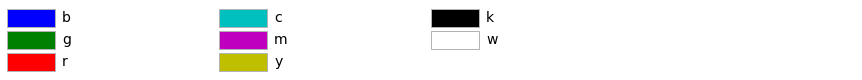

Tableau Colors
['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']


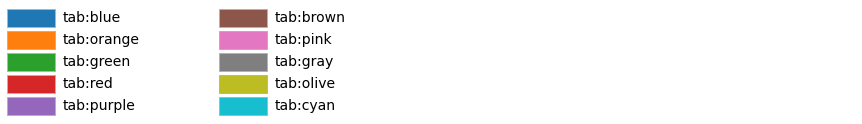

Rainbow
['#ff0029', '#ffbc00', '#5cff00', '#00ff89', '#008fff', '#5800ff', '#ff00bf']


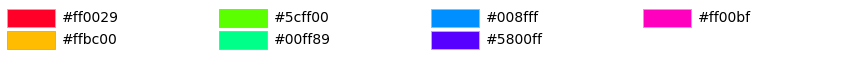

Jet
['#000080', '#002aff', '#00d4ff', '#7bff7b', '#ffe600', '#ff4800', '#800000']


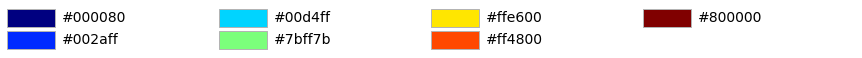

BPY
['#000066', '#0000ee', '#5d00ff', '#c729d6', '#ff6d92', '#ffb14e', '#fff50a']


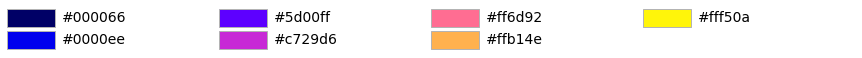

In [16]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle


def bpy_color_palette(n=50, cutoff_tails=0.1):
    """
    Generate a color palette with specific number.
    Ref. https://www.rdocumentation.org/packages/gstat/versions/0.9-22/topics/bpy.colors

    Args:
        n (int): number of colors
        cutoff_tails (float): tail fraction to be cut off. This palette runs from black to white if cutoff.tails is 0; by cutting off the tails, it runs from blue to yellow, which looks nicer.
    Returns:
        color_list (list): list of hex color code.
    """
    item_list = np.linspace(start=0.5 * cutoff_tails, stop=1 - 0.5 * cutoff_tails, num=n)
    color_list = []
    for i in item_list:
        ### R
        if(i < 0.25):
            r = 0
        elif(i < 0.57):
            r =  i / .32 - .78125
        else:
            r = 1
        ### G
        if(i < 0.42):
            g = 0
        elif(i < 0.92):
            g =  2 * i - .84
        else:
            g = 1
        ### B
        if(i < 0.25):
            b = 4 * i
        elif(i < 0.42):
            b =  1
        elif(i < 0.92):
            b =  -2 * i + 1.84
        else:
            b = i / .08 - 11.5
        ### append color
        color_list.append(matplotlib.colors.to_hex([ r, g, b ]))
    cmap = matplotlib.colors.ListedColormap(color_list, name='my_colormap')
    return cmap

def plot_colortable(colors, sort_colors=True, emptycols=0):
    """
    Show color table.
    Ref. https://matplotlib.org/stable/gallery/color/named_colors.html
    """
    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))), name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                    height=18, facecolor=colors[name], edgecolor='0.7')
        )
    return fig


print("Base Colors")
# print(mcolors.BASE_COLORS)
print(list(mcolors.BASE_COLORS.keys()))
plot_colortable(mcolors.BASE_COLORS, sort_colors=False, emptycols=1)
plt.show()

print("Tableau Colors")
# print(mcolors.TABLEAU_COLORS)
print(list(mcolors.TABLEAU_COLORS.keys()))
plot_colortable(mcolors.TABLEAU_COLORS, sort_colors=False, emptycols=2)
plt.show()

print("Rainbow")
cmap = plt.cm.get_cmap('gist_rainbow', 7)
color_list = [matplotlib.colors.to_hex(cmap(i)) for i in range(cmap.N)]
color_dict = {color : matplotlib.colors.to_rgba(color) for color in color_list}
print(cmap)
print(color_list)
plot_colortable(color_dict, sort_colors=False)
plt.show()

print("Jet")
cmap = plt.get_cmap('jet', 7)
color_list = [matplotlib.colors.to_hex(cmap(i)) for i in range(cmap.N)]
color_dict = {color : matplotlib.colors.to_rgba(color) for color in color_list}
print(cmap)
print(color_list)
plot_colortable(color_dict, sort_colors=False)
plt.show()

print("BPY")
cmap = bpy_color_palette(7, 0.2)
color_list = [matplotlib.colors.to_hex(cmap(i)) for i in range(cmap.N)]
color_dict = {color : color for color in color_list}
print(cmap)
print(color_list)
plot_colortable(color_dict, sort_colors=False)
plt.show()

### Common Markers Selection

Unfilled markers
['.', ',', '1', '2', '3', '4', '+', 'x', '|', '_', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


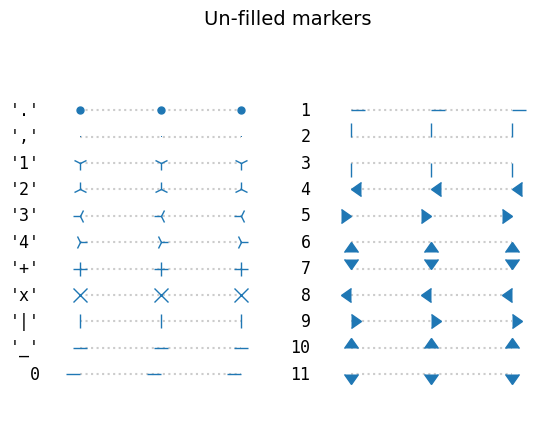

Filled markers
['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']


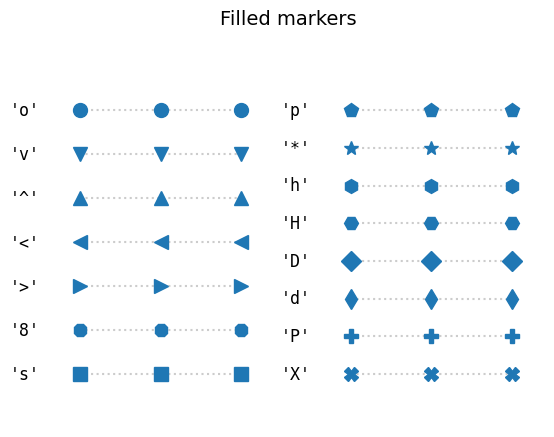

In [4]:
from matplotlib.markers import MarkerStyle
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.transforms import Affine2D


"""
Show common markers.
Ref. https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html
"""
text_style = dict(horizontalalignment='right', verticalalignment='center',
                fontsize=12, fontfamily='monospace')
marker_style = dict(linestyle=':', color='0.8', markersize=10,
                    markerfacecolor="tab:blue", markeredgecolor="tab:blue")

def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    ax.invert_yaxis()

def split_list(a_list):
    i_half = len(a_list) // 2
    return a_list[:i_half], a_list[i_half:]


### Unfilled markers
fig, axs = plt.subplots(ncols=2)
fig.suptitle('Un-filled markers', fontsize=14)
# Filter out filled markers and marker settings that do nothing.
unfilled_markers = [m for m, func in Line2D.markers.items()
                    if func != 'nothing' and m not in Line2D.filled_markers]
print("Unfilled markers")
print(unfilled_markers)
for ax, markers in zip(axs, split_list(unfilled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, repr(marker), **text_style)
        ax.plot([y] * 3, marker=marker, **marker_style)
    format_axes(ax)

plt.show()

### Filled markers
fig, axs = plt.subplots(ncols=2)
fig.suptitle('Filled markers', fontsize=14)
print("Filled markers")
print(list(Line2D.filled_markers))
for ax, markers in zip(axs, split_list(Line2D.filled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, repr(marker), **text_style)
        ax.plot([y] * 3, marker=marker, **marker_style)
    format_axes(ax)

plt.show()

### Packet Loss Statistics

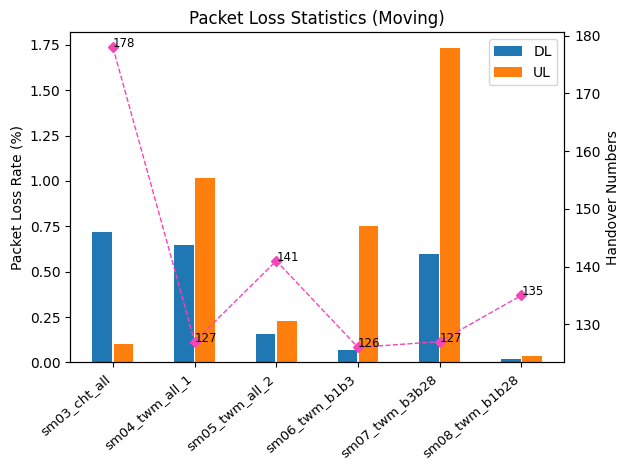

In [9]:
settings = {
    "sm03" : "cht_all",
    "sm04" : "twm_all_1",
    "sm05" : "twm_all_2", 
    "sm06" : "twm_b1b3",
    "sm07" : "twm_b3b28",
    "sm08" : "twm_b1b28",
}

loss_arr = [[], []]
honum_arr = [[], []]
root_dir = "/home/wmnlab/D/database/2022-10-11/_Bandlock_Udp/"
for i, item in enumerate(['dwnlnk', 'uplnk']):
    for key, val in settings.items():
        df = pd.read_csv(os.path.join(root_dir, key, "{}_udp_loss_statistics_meta_{}.csv".format(item, val)))
        loss_arr[i].append(float(df[df['type'] == 'overall']['packet_loss_rate(%)']))
        honum_arr[i].append(int(df[df['type'] == 'overall']['overall_handoff']))

# labels = list(settings.values())
labels = ["{}_{}".format(key, val) for key, val in settings.items()]

x = np.arange(len(labels))  # the label locations
width = 0.24  # the width of the bars
space = 0.26

fig, ax = plt.subplots()
rects1 = ax.bar(x - space/2, loss_arr[0], width, label='DL')
rects2 = ax.bar(x + space/2, loss_arr[1], width, label='UL')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Packet Loss Rate (%)')
ax.set_title('Packet Loss Statistics (Moving)')
ax.legend()

ax.set_xticks(x, labels)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, fontsize=9.5, ha="right")

# ax.set_ylim(top=round(max(classif_5_df['packet_loss_rate(%)'].iloc[24:30]) + 0.2, 1))
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

ax2 = ax.twinx()
ax2.plot(x, honum_arr[0], c='#f546b9', linestyle='--', linewidth=1, marker='D', markersize=5)
ax2.set_ylabel('Handover Numbers')
for i, txt in enumerate(honum_arr[0]):
    ax2.annotate(str(honum_arr[0][i]), (x[i], honum_arr[0][i]), size=8.5)

fig.tight_layout()

plt.show()

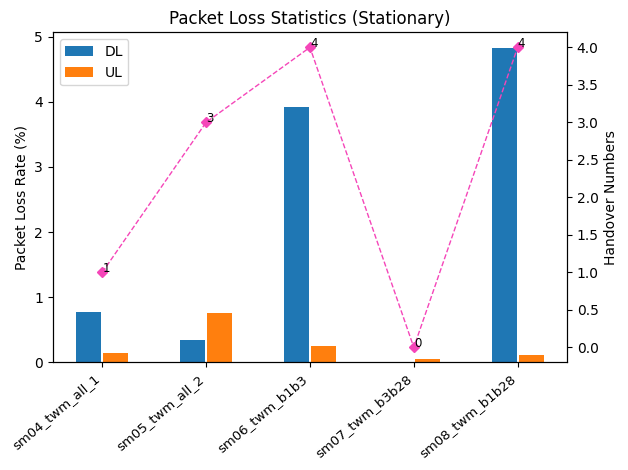

In [31]:
settings = {
    "sm04" : "twm_all_1",
    "sm05" : "twm_all_2", 
    "sm06" : "twm_b1b3",
    "sm07" : "twm_b3b28",
    "sm08" : "twm_b1b28",
}

loss_arr = [[], []]
honum_arr = [[], []]
root_dir = "/home/wmnlab/D/database/2022-10-20/_Udp_Stationary_Bandlock/"
for i, item in enumerate(['dwnlnk', 'uplnk']):
    for key, val in settings.items():
        df = pd.read_csv(os.path.join(root_dir, key, "{}_udp_loss_statistics_meta_{}.csv".format(item, val)))
        loss_arr[i].append(float(df[df['type'] == 'overall']['packet_loss_rate(%)']))
        honum_arr[i].append(int(df[df['type'] == 'overall']['overall_handoff']))

# labels = list(settings.values())
labels = ["{}_{}".format(key, val) for key, val in settings.items()]

x = np.arange(len(labels))  # the label locations
width = 0.24  # the width of the bars
space = 0.26

fig, ax = plt.subplots()
rects1 = ax.bar(x - space/2, loss_arr[0], width, label='DL')
rects2 = ax.bar(x + space/2, loss_arr[1], width, label='UL')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Packet Loss Rate (%)')
ax.set_title('Packet Loss Statistics (Stationary)')
ax.legend()

ax.set_xticks(x, labels)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, fontsize=9.5, ha="right")

# ax.set_ylim(top=round(max(classif_5_df['packet_loss_rate(%)'].iloc[24:30]) + 0.2, 1))
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

ax2 = ax.twinx()
ax2.plot(x, honum_arr[0], c='#f546b9', linestyle='--', linewidth=1, marker='D', markersize=5)
ax2.set_ylabel('Handover Numbers')
for i, txt in enumerate(honum_arr[0]):
    ax2.annotate(str(honum_arr[0][i]), (x[i], honum_arr[0][i]), size=8.5)

fig.tight_layout()

plt.show()

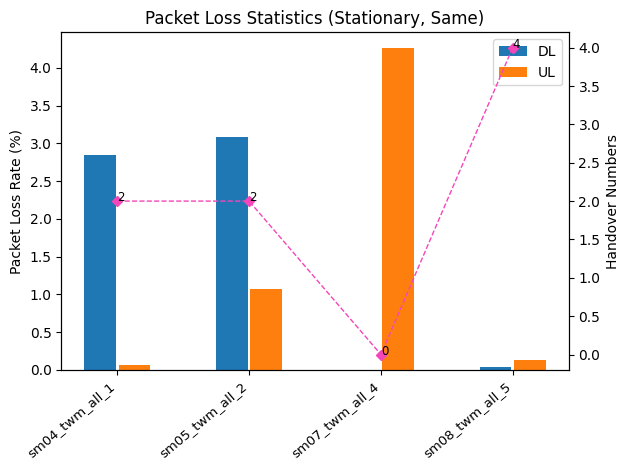

In [32]:
settings = {
    "sm04" : "twm_all_1",
    "sm05" : "twm_all_2", 
    # "sm06" : "twm_gsm",
    "sm07" : "twm_all_4",
    "sm08" : "twm_all_5",
}

loss_arr = [[], []]
honum_arr = [[], []]
root_dir = "/home/wmnlab/D/database/2022-10-20/_Udp_Stationary_SameSetting/"
for i, item in enumerate(['dwnlnk', 'uplnk']):
    for key, val in settings.items():
        df = pd.read_csv(os.path.join(root_dir, key, "{}_udp_loss_statistics_meta_{}.csv".format(item, val)))
        loss_arr[i].append(float(df[df['type'] == 'overall']['packet_loss_rate(%)']))
        honum_arr[i].append(int(df[df['type'] == 'overall']['overall_handoff']))

# labels = list(settings.values())
labels = ["{}_{}".format(key, val) for key, val in settings.items()]

x = np.arange(len(labels))  # the label locations
width = 0.24  # the width of the bars
space = 0.26

fig, ax = plt.subplots()
rects1 = ax.bar(x - space/2, loss_arr[0], width, label='DL')
rects2 = ax.bar(x + space/2, loss_arr[1], width, label='UL')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Packet Loss Rate (%)')
ax.set_title('Packet Loss Statistics (Stationary, Same)')
ax.legend()

ax.set_xticks(x, labels)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, fontsize=9.5, ha="right")

# ax.set_ylim(top=round(max(classif_5_df['packet_loss_rate(%)'].iloc[24:30]) + 0.2, 1))
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

ax2 = ax.twinx()
ax2.plot(x, honum_arr[0], c='#f546b9', linestyle='--', linewidth=1, marker='D', markersize=5)
ax2.set_ylabel('Handover Numbers')
for i, txt in enumerate(honum_arr[0]):
    ax2.annotate(str(honum_arr[0][i]), (x[i], honum_arr[0][i]), size=8.5)

fig.tight_layout()

plt.show()

### LTE / NR RSRP (CIMON), Packet Loss, Handover Occurrence

lte_handover: 8
SN_addition: 9
SN_removal: 8
endc_SN_change: 5
endc_MN_change: 19
endc_MNSN_change: 0
lte2endc_MN_change: 0
endc2lte_MN_change: 0
---------------------
scg_failure: 0
radio_link_failure: 0
nas_recovery: 0
---------------------
total: 49


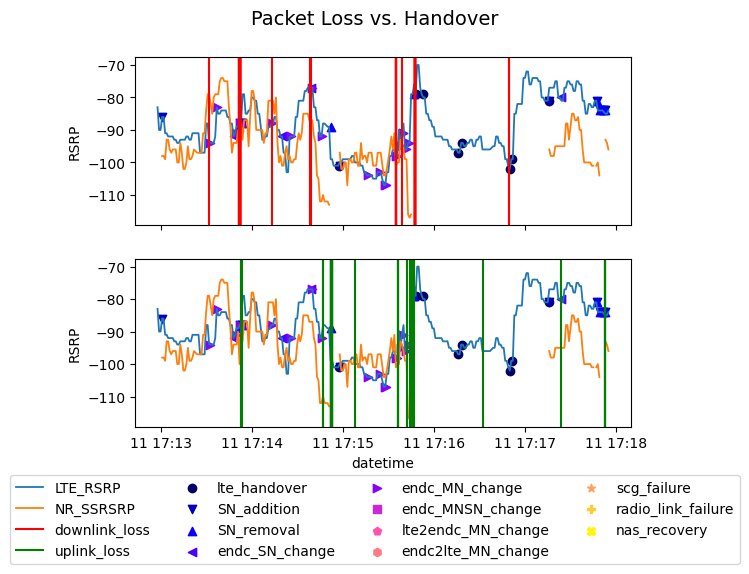

In [20]:
### start() -> stop()
### begin() -> end()
### you could use finish() to clean up and close the program but close() is more used.

def str_to_datetime(ts):
    """
    Convert a timestamp string in microseconds or milliseconds into datetime.datetime

    Args:
        ts (str): timestamp string (e.g., 2022-09-29 16:24:58.252615)
    Returns:
        (datetime.datetime)
    """
    try:
        ts_datetime = dt.datetime.strptime(ts, '%Y-%m-%d %H:%M:%S.%f')
    except:
        ts_datetime = dt.datetime.strptime(ts, '%Y-%m-%d %H:%M:%S')
    return ts_datetime

class LossAnalyzeCimon:
    def __init__(self, date, rsrp_csv, ho_csv, dlloss_csv, dlrecv_csv, ulloss_csv, ulxmit_csv):
        self.date = date
        self.rsrp_df = pd.read_csv(rsrp_csv)
        self.ho_df = pd.read_csv(ho_csv)
        self.dlloss_df = pd.read_csv(dlloss_csv)
        self.dlrecv_df = pd.read_csv(dlrecv_csv)
        self.ulloss_df = pd.read_csv(ulloss_csv)
        self.ulxmit_df = pd.read_csv(ulxmit_csv)
        # for df in [self.rsrp_df, self.ho_df, self.dlloss_df, self.dlrecv_df, self.ulloss_df, self.ulxmit_df]:
        #     df["Timestamp"] = pd.to_datetime(df["Timestamp"])
        self.rsrp_df["Date"] = pd.to_datetime(self.rsrp_df["Date"])
        self.ho_df["time"] = pd.to_datetime(self.ho_df["time"])
        self.dlloss_df["arrival.time"] = pd.to_datetime(self.dlloss_df["arrival.time"])
        self.dlrecv_df["arrival.time"] = pd.to_datetime(self.dlrecv_df["arrival.time"])
        self.ulloss_df["arrival.time"] = pd.to_datetime(self.ulloss_df["arrival.time"])
        self.ulxmit_df["transmit.time"] = pd.to_datetime(self.ulxmit_df["transmit.time"])
        start_time = self.start()
        stop_time = self.stop()
        ###
        self.rsrp_df = self.rsrp_df[(self.rsrp_df["Date"] >= start_time - dt.timedelta(seconds=3)) & (self.rsrp_df["Date"] <= stop_time + dt.timedelta(seconds=3))]
        self.rsrp_df.reset_index(drop=True, inplace=True)
        ###
        if len(self.ho_df):
            start_indices = self.ho_df.index[self.ho_df['time'] >= start_time]
            stop_indices = self.ho_df.index[self.ho_df['time'] <= stop_time]
            if len(start_indices) and len(stop_indices):
                start_index = start_indices[0]
                stop_index = stop_indices[-1]
                if self.ho_df.loc[start_index, 'handoff_state'] == 'end':
                    self.ho_df.loc[start_index - 1, 'time'] = start_time
                    start_index -= 1
                if self.ho_df.loc[stop_index, 'handoff_state'] == 'start':
                    self.ho_df.loc[stop_index + 1, 'time'] = stop_time
                    stop_index += 1
                self.ho_df = self.ho_df.iloc[start_index : stop_index + 1]
            else:
                self.ho_df = self.ho_df.iloc[0:0]
        # self.ho_df = self.ho_df[self.ho_df['handoff_state'] == 'start']
        self.ho_df = self.ho_df[self.ho_df['handoff_state'] != 'end']
        self.ho_df.reset_index(drop=True, inplace=True)
        ### additional info
        for i in range(len(self.ho_df)):
            self.ho_df.loc[i, "rsrp"] = self.ho_rsrp(self.ho_df.loc[i, "time"], self.rsrp_df)
    
    def start(self):
        candidate = []
        # [candidate.append(df["Timestamp"].iloc[0]) for df in [self.dlloss_df, self.dlrecv_df, self.ulloss_df, self.ulxmit_df] if len(df)]
        if len(self.dlloss_df):
            candidate.append(self.dlloss_df["arrival.time"].iloc[0])
        if len(self.dlrecv_df):
            candidate.append(self.dlrecv_df["arrival.time"].iloc[0])
        if len(self.ulloss_df):
            candidate.append(self.ulloss_df["arrival.time"].iloc[0])
        if len(self.ulxmit_df):
            candidate.append(self.ulxmit_df["transmit.time"].iloc[0])
        return min(candidate) if candidate else dt.datetime.min
    
    def stop(self):
        candidate = []
        # [candidate.append(df["Timestamp"].iloc[-1]) for df in [self.dlloss_df, self.dlrecv_df, self.ulloss_df, self.ulxmit_df] if len(df)]
        if len(self.dlloss_df):
            candidate.append(self.dlloss_df["arrival.time"].iloc[-1])
        if len(self.dlrecv_df):
            candidate.append(self.dlrecv_df["arrival.time"].iloc[-1])
        if len(self.ulloss_df):
            candidate.append(self.ulloss_df["arrival.time"].iloc[-1])
        if len(self.ulxmit_df):
            candidate.append(self.ulxmit_df["transmit.time"].iloc[-1])
        return max(candidate) if candidate else dt.datetime.max
    
    @staticmethod
    def ho_rsrp(ts, rsrp_df):
        ### assume cimon (at_log) -> mi -> tx/rx pcap -> stop pcap -> stop mi -> stop cimon (at_log)
        indices_around = rsrp_df.index[rsrp_df['Date'] <= ts]
        return int(rsrp_df.loc[indices_around[-1], "LTE_RSRP"]) if len(indices_around) else '-'
    
    def unified(self, ts):
        if len(ts) == 5:
            ts = "{} {}:00".format(self.date, ts)
        elif len(ts) == 8:
            ts = "{} {}".format(self.date, ts)
        return ts
    
    def plot(self, start_time=None, stop_time=None):
        rsrp_df, ho_df, dlloss_df, dlrecv_df, ulloss_df, ulxmit_df = self.rsrp_df.copy(), self.ho_df.copy(), self.dlloss_df.copy(), self.dlrecv_df.copy(), self.ulloss_df.copy(), self.ulxmit_df.copy()
        if start_time and stop_time:
            start_time = str_to_datetime(self.unified(start_time))
            stop_time = str_to_datetime(self.unified(stop_time))
            rsrp_df = rsrp_df[(rsrp_df["Date"] >= start_time) & (rsrp_df["Date"] <= stop_time)]
            ho_df = ho_df[(ho_df["time"] >= start_time) & (ho_df["time"] <= stop_time)]
            dlloss_df = dlloss_df[(dlloss_df["arrival.time"] >= start_time) & (dlloss_df["arrival.time"] <= stop_time)]
            dlrecv_df = dlrecv_df[(dlrecv_df["arrival.time"] >= start_time) & (dlrecv_df["arrival.time"] <= stop_time)]
            ulloss_df = ulloss_df[(ulloss_df["arrival.time"] >= start_time) & (ulloss_df["arrival.time"] <= stop_time)]
            ulxmit_df = ulxmit_df[(ulxmit_df["transmit.time"] >= start_time) & (ulxmit_df["transmit.time"] <= stop_time)]
            for df in [rsrp_df, ho_df, dlloss_df, dlrecv_df, ulloss_df, ulxmit_df]:
                # df = df[(df["Timestamp"] >= start_time) & (df["Timestamp"] <= stop_time)]
                df.reset_index(drop=True, inplace=True)
            
        ### Plotting
        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)
        fig.suptitle('Packet Loss vs. Handover', fontsize=14)

        ### draw RSRP
        time_lte = rsrp_df["Date"].array
        rsrp_lte = rsrp_df["LTE_RSRP"].astype(int).array
        lte_rsrp_plot, = ax1.plot(time_lte, rsrp_lte, 'tab:blue', linewidth=1.3)
        lte_rsrp_plot, = ax2.plot(time_lte, rsrp_lte, 'tab:blue', linewidth=1.3)

        time_nr = []
        rsrp_nr = []
        for i in range(len(rsrp_df)):
            if rsrp_df.loc[i, "NR_SSRSRP"] == '-' and len(rsrp_nr):
                ax1.plot(time_nr, rsrp_nr, 'tab:orange', linewidth=1.3)
                ax2.plot(time_nr, rsrp_nr, 'tab:orange', linewidth=1.3)
                rsrp_nr = []
                time_nr = []
            elif rsrp_df.loc[i, "NR_SSRSRP"] != '-':
                time_nr.append(rsrp_df.loc[i, "Date"])
                rsrp_nr.append(int(rsrp_df.loc[i, "NR_SSRSRP"]))
        nr_rsrp_plot, = ax1.plot(time_nr, rsrp_nr, 'tab:orange', linewidth=1.3)
        nr_rsrp_plot, = ax2.plot(time_nr, rsrp_nr, 'tab:orange', linewidth=1.3)

        ### draw packet loss
        dlloss_plot = [ax1.axvline(dlloss_df.loc[i, "arrival.time"], c = 'r') for i in range(len(dlloss_df))][0]
        ulloss_plot = [ax2.axvline(ulloss_df.loc[i, "arrival.time"], c = 'g') for i in range(len(ulloss_df))][0]

        ### draw handover
        # ho_types = "lte_handover,SN_addition,SN_removal,endc_SN_change,endc_MN_change,endc_MNSN_change,lte2endc_MN_change,endc2lte_MN_change".split(',')
        ho_types = "lte_handover,SN_addition,SN_removal,endc_SN_change,endc_MN_change,endc_MNSN_change,lte2endc_MN_change,endc2lte_MN_change,scg_failure,radio_link_failure,nas_recovery".split(',')

        x = ho_df["time"].array
        y = ho_df["rsrp"].array
        group = ho_df["handoff_type"].array
        # cmap = bpy_color_palette(8, 0.2)
        cmap = bpy_color_palette(11, 0.2)
        color_list = [matplotlib.colors.to_hex(cmap(i)) for i in range(cmap.N)]
        color_dict = {_type : color for color, _type in zip(color_list, ho_types)}
        # marker_list = ['o', 'v', '^', '<', '>', 's', 'p', 'h']
        marker_list = ['o', 'v', '^', '<', '>', 's', 'p', 'h', '*', 'P', 'X']
        marker_dict = {_type : marker for marker, _type in zip(marker_list, ho_types)}

        ho_plots = [None]*len(ho_types)
        for i, _type in enumerate(ho_types):
            indices = np.where(group == _type)
            ho_plots[i] = ax1.scatter(x[indices], y[indices], marker=marker_dict[_type], c=color_dict[_type])
            ho_plots[i] = ax2.scatter(x[indices], y[indices], marker=marker_dict[_type], c=color_dict[_type])

        ### adjust figure layout
        handles = [lte_rsrp_plot, nr_rsrp_plot, dlloss_plot, ulloss_plot] + ho_plots
        labels = ["LTE_RSRP", "NR_SSRSRP", "downlink_loss", "uplink_loss"] + ho_types

        axbox = ax2.get_position()
        fig.legend(
            handles=handles, labels=labels,
            loc='lower center',
            bbox_to_anchor=[0, axbox.y0-0.3,1,1],
            # ncol=3,
            ncol=4,
        )

        plt.xlabel('datetime')
        ax1.set_ylabel('RSRP')
        ax2.set_ylabel('RSRP')

        ### handover statistics
        summ = 0
        for _type in ho_types[:8]:
            _tmp = ho_df[ho_df["handoff_type"] == _type]
            summ += len(_tmp)
            print("{}: {}".format(_type, len(_tmp)))
        print("---------------------")
        for _type in ho_types[8:]:
            _tmp = ho_df[ho_df["handoff_type"] == _type]
            summ += len(_tmp)
            print("{}: {}".format(_type, len(_tmp)))
        print("---------------------")
        print("total: {}".format(summ))

        ### show figure
        plt.show()

def file_collector(type):
    """
    
    """
    return

loss_analysis = LossAnalyzeCimon( "2022-10-11",
                                "/home/wmnlab/D/database/2022-10-11/_Bandlock_Udp/sm04/#01/data/cimon_sm04_2022-10-11_17-08-56_preproc.csv",
                                "/home/wmnlab/D/database/2022-10-11/_Bandlock_Udp/sm04/#01/analysis/diag_log_ho-info.csv",
                                "/home/wmnlab/D/database/2022-10-11/_Bandlock_Udp/sm04/#01/analysis/dwnlnk_udp_loss_timestamp.csv",
                                "/home/wmnlab/D/database/2022-10-11/_Bandlock_Udp/sm04/#01/analysis/clt_dwnlnk_udp_packet_brief.csv",
                                "/home/wmnlab/D/database/2022-10-11/_Bandlock_Udp/sm04/#01/analysis/uplnk_udp_loss_timestamp.csv",
                                "/home/wmnlab/D/database/2022-10-11/_Bandlock_Udp/sm04/#01/analysis/clt_uplnk_udp_packet_brief.csv" )
loss_analysis.plot()

lte_handover: 0
SN_addition: 3
SN_removal: 2
endc_SN_change: 2
endc_MN_change: 4
endc_MNSN_change: 0
lte2endc_MN_change: 0
endc2lte_MN_change: 0
---------------------
scg_failure: 0
radio_link_failure: 0
nas_recovery: 0
---------------------
total: 11


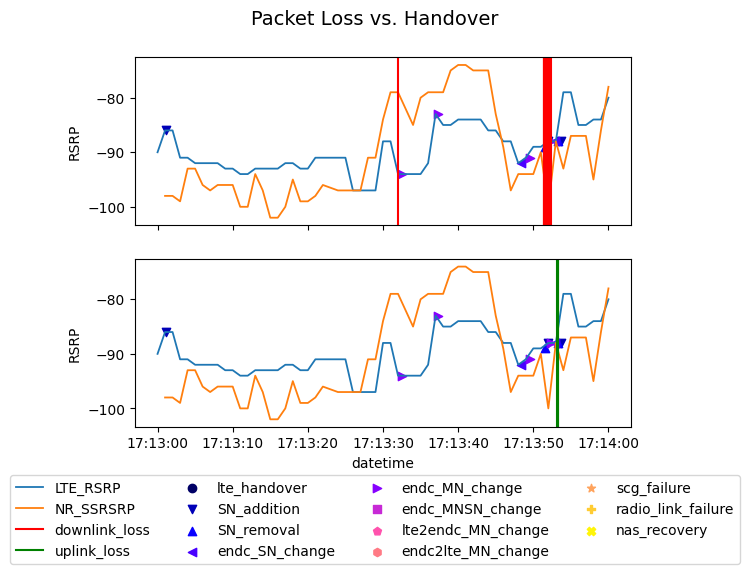

In [21]:
loss_analysis.plot('17:13', '17:14')

lte_handover: 0
SN_addition: 2
SN_removal: 2
endc_SN_change: 1
endc_MN_change: 1
endc_MNSN_change: 0
lte2endc_MN_change: 0
endc2lte_MN_change: 0
---------------------
scg_failure: 0
radio_link_failure: 0
nas_recovery: 0
---------------------
total: 6


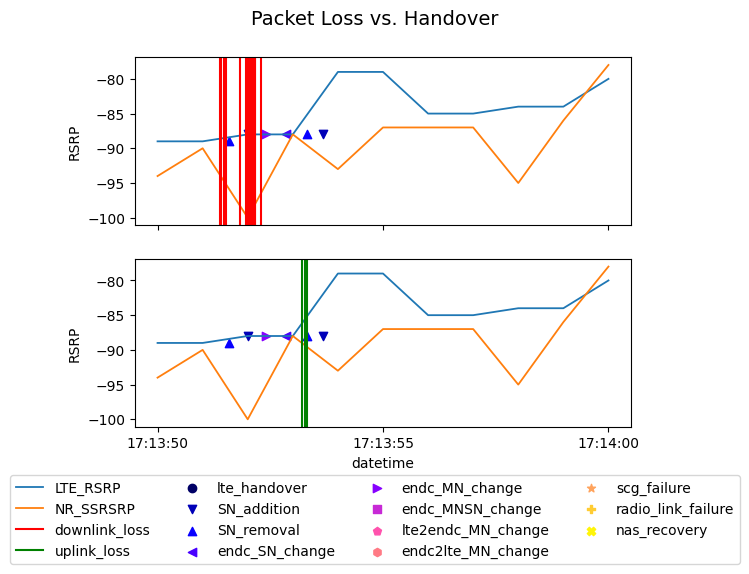

In [22]:
loss_analysis.plot('17:13:50', '17:14:00')

### Packet Loss Classification

##### Grouped Bar Chart

目前缺點：無法顯示 0 是真的 loss rate == 0 % 還是單純這個 event 沒有發生（不確定該怎麼呈現）

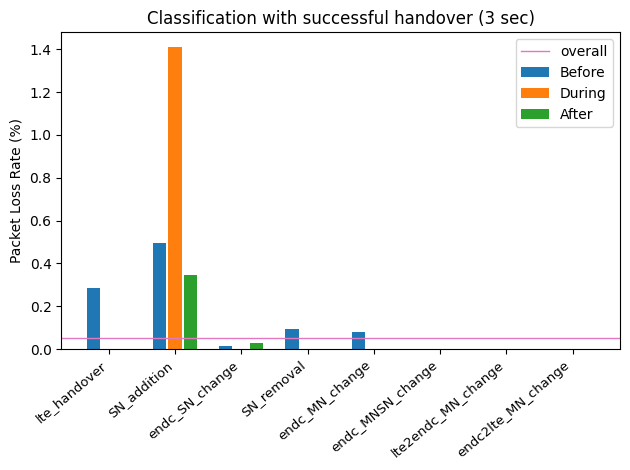

In [31]:
classif_3_df = pd.read_csv("/home/wmnlab/D/database/2022-10-11/_Bandlock_Udp/sm04/#01/analysis/class-ratio-50p/dwnlnk_loss_ho_classify_3.csv")

# ho_types = "lte_handover,SN_addition,SN_removal,endc_SN_change,endc_MN_change,endc_MNSN_change,lte2endc_MN_change,endc2lte_MN_change".split(',')
ho_types = "lte_handover,SN_addition,endc_SN_change,SN_removal,endc_MN_change,endc_MNSN_change,lte2endc_MN_change,endc2lte_MN_change".split(',')

labels = ho_types
before_event_loss_rate = classif_3_df['packet_loss_rate(%)'].iloc[:24:3].array
during_event_loss_rate = classif_3_df['packet_loss_rate(%)'].iloc[1:24:3].array
after_event_loss_rate = classif_3_df['packet_loss_rate(%)'].iloc[2:24:3].array

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
space = 0.7

fig, ax = plt.subplots()
rects1 = ax.bar(x - space/3, before_event_loss_rate, width, label='Before')
rects2 = ax.bar(x          , during_event_loss_rate, width, label='During')
rects3 = ax.bar(x + space/3, after_event_loss_rate, width, label='After')
ax.axhline(float(classif_3_df[classif_3_df['type'] == 'overall']['packet_loss_rate(%)']), c = 'tab:pink', linewidth=1, label='overall')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Packet Loss Rate (%)')
ax.set_title('Classification with successful handover (3 sec)')
ax.legend()

ax.set_xticks(x, labels)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, fontsize=9.5, ha="right")

# ax.set_ylim(top=round(max(classif_3_df['packet_loss_rate(%)'].iloc[:24]) + 0.2, 1))
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
# ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()

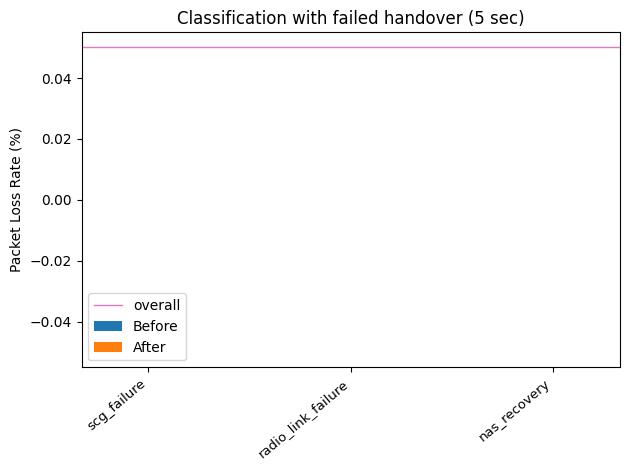

In [46]:
classif_5_df = pd.read_csv("/home/wmnlab/D/database/2022-10-11/_Bandlock_Udp/sm04/#01/analysis/class-ratio-50p/dwnlnk_loss_ho_classify_5.csv")

rlf_types = "scg_failure,radio_link_failure,nas_recovery".split(',')

labels = rlf_types
before_event_loss_rate = classif_3_df['packet_loss_rate(%)'].iloc[24:30:2].array
after_event_loss_rate = classif_3_df['packet_loss_rate(%)'].iloc[25:30:2].array

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
space = 0.22

fig, ax = plt.subplots()
rects1 = ax.bar(x - space/2, before_event_loss_rate, width, label='Before')
rects2 = ax.bar(x + space/2, after_event_loss_rate, width, label='After')
ax.axhline(float(classif_5_df[classif_5_df['type'] == 'overall']['packet_loss_rate(%)']), c = 'tab:pink', linewidth=1, label='overall')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Packet Loss Rate (%)')
ax.set_title('Classification with failed handover (5 sec)')
ax.legend()

ax.set_xticks(x, labels)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, fontsize=9.5, ha="right")

# ax.set_ylim(top=round(max(classif_5_df['packet_loss_rate(%)'].iloc[24:30]) + 0.2, 1))
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

##### Line Chart

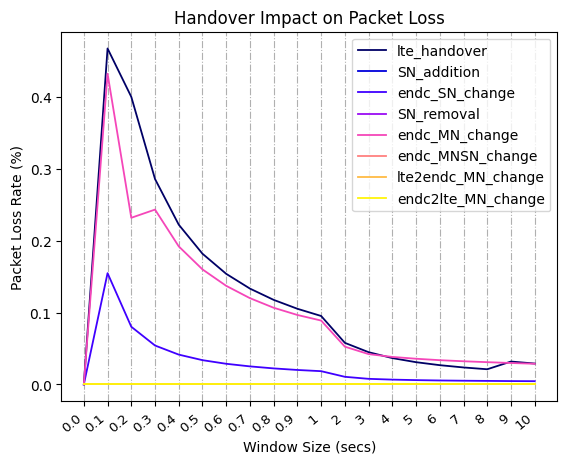

In [33]:
# df = pd.read_csv("/home/wmnlab/D/database/2022-10-11/_Bandlock_Udp/sm03/#01/analysis/udp-loss-classify-50p/dwnlnk_loss_ho_classify_total.csv")
# df = pd.read_csv("/home/wmnlab/D/database/2022-10-11/_Bandlock_Udp/sm04/#01/analysis/udp-loss-classify-50p/dwnlnk_loss_ho_classify_total.csv")
# df = pd.read_csv("/home/wmnlab/D/database/2022-10-11/_Bandlock_Udp/sm05/#01/analysis/udp-loss-classify-50p/dwnlnk_loss_ho_classify_total.csv")
# df = pd.read_csv("/home/wmnlab/D/database/2022-10-11/_Bandlock_Udp/sm06/#01/analysis/udp-loss-classify-50p/dwnlnk_loss_ho_classify_total.csv")
# df = pd.read_csv("/home/wmnlab/D/database/2022-10-11/_Bandlock_Udp/sm07/#01/analysis/udp-loss-classify-50p/dwnlnk_loss_ho_classify_total.csv")
df = pd.read_csv("/home/wmnlab/D/database/2022-10-11/_Bandlock_Udp/sm08/#01/analysis/udp-loss-classify-50p/dwnlnk_loss_ho_classify_total.csv")


ho_types = "lte_handover,SN_addition,endc_SN_change,SN_removal,endc_MN_change,endc_MNSN_change,lte2endc_MN_change,endc2lte_MN_change".split(',')
rlf_types = "scg_failure,radio_link_failure,nas_recovery".split(',')

ss = [i/10 for i in range(10)] + list(range(1, 11))
labels = [str(s) for s in ss]

x = np.arange(len(labels))
yy = []

for i, _type in enumerate(ho_types):
    yy.append([])
    for j, wsize in enumerate(ss):
        _packet_num = int(df.loc[5*j+2, 'before_{}'.format(_type)]) + int(df.loc[5*j+2, 'during_{}'.format(_type)]) + int(df.loc[5*j+2, 'after_{}'.format(_type)])
        _loss_num = int(df.loc[5*j+3, 'before_{}'.format(_type)]) + int(df.loc[5*j+3, 'during_{}'.format(_type)]) + int(df.loc[5*j+3, 'after_{}'.format(_type)])
        yy[i].append(_loss_num / (_packet_num + 1e-9) * 100)

### Plotting
fig, ax = plt.subplots()

cmap = bpy_color_palette(8, 0.2)
color_list = [matplotlib.colors.to_hex(cmap(i)) for i in range(cmap.N)]
color_dict = {_type : color for color, _type in zip(color_list, ho_types)}

for i, _type in enumerate(ho_types):
    ax.plot(x, yy[i], color_list[i], linewidth=1.3, label=_type)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x, labels)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, fontsize=9.5, ha="right")

ax.set_xlabel('Window Size (secs)')
ax.set_ylabel('Packet Loss Rate (%)')
ax.set_title('Handover Impact on Packet Loss')
ax.grid(axis='x', linestyle='-.')
ax.legend()

plt.show()